### Satram Shane Sarabdial Assignment 1

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from yahooquery import Ticker
import statsmodels.api as sm
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats
from statsmodels.graphics.regressionplots import *
import seaborn as sns
import copy
#from sklearn.cross_validation import train_test_split
import math
import time

### Question 1: Verify that  the type of data0 is a dataframe. The index of this data frame is:

In [5]:
symbols = ['SPY', 'XLF', 'JPM', 'BAC', 'WFC', 'C', 'PNC', 'EWBC', 'BK', 'SBNY']
tickers = Ticker(symbols)
data = tickers.history(start='2005-12-30', end='2021-12-31', interval='1mo')
data

open       close         low        high  \
symbol date                                                         
SPY    2006-01-01  125.190002  127.500000  124.389999  129.440002   
       2006-02-01  127.820000  128.229996  125.400002  130.039993   
       2006-03-01  128.600006  129.830002  127.180000  131.470001   
       2006-03-17         NaN         NaN         NaN         NaN   
       2006-04-01  130.070007  131.470001  128.020004  131.860001   
...                       ...         ...         ...         ...   
SBNY   2021-09-01  260.350006  272.279999  246.100006  280.089996   
       2021-10-01  274.700012  297.820007  272.010010  317.510010   
       2021-10-28         NaN         NaN         NaN         NaN   
       2021-11-01  301.359985  302.299988  299.000000  342.029999   
       2021-12-01  314.200012  323.470001  288.149994  328.209991   

                         volume    adjclose  dividends  splits  
symbol date                                                     
SPY    2006-01-01  1.233911e+09   92.759422      0.000     0.0  
       2006-02-01  1.145244e+09   93.290520      0.000     0.0  
       2006-03-01  1.350777e+09   94.454544      0.000     0.0  
       2006-03-17           NaN         NaN      0.519     0.0  
       2006-04-01  1.300328e+09   96.028030      0.000     0.0  
...                         ...         ...        ...     ...  
SBNY   2021-09-01  1.073460e+07  270.652191      0.000     0.0  
       2021-10-01  1.212230e+07  296.039520      0.000     0.0  
       2021-10-28           NaN         NaN      0.560     0.0  
       2021-11-01  1.832010e+07  301.063141      0.000     0.0  
       2021-12-01  2.784870e+07  322.146545      0.000     0.0  

[2474 rows x 8 columns]

### Question 2: create a data frame data0_  from data0 by droping its missing values. Print data0.shape and data0_shape.

In [6]:
data1 = data.dropna()
data1.head()

open       close         low        high  \
symbol date                                                         
SPY    2006-01-01  125.190002  127.500000  124.389999  129.440002   
       2006-02-01  127.820000  128.229996  125.400002  130.039993   
       2006-03-01  128.600006  129.830002  127.180000  131.470001   
       2006-04-01  130.070007  131.470001  128.020004  131.860001   
       2006-05-01  131.470001  127.510002  124.760002  132.800003   

                         volume   adjclose  dividends  splits  
symbol date                                                    
SPY    2006-01-01  1.233911e+09  92.759422        0.0     0.0  
       2006-02-01  1.145244e+09  93.290520        0.0     0.0  
       2006-03-01  1.350777e+09  94.454544        0.0     0.0  
       2006-04-01  1.300328e+09  96.028030        0.0     0.0  
       2006-05-01  1.752747e+09  93.135590        0.0     0.0

In [7]:
data1.shape

(1920, 8)

### Question 3: Create a dataframe with a name, data, by resting the index of data0_
### Filter out data frame ,df, for  for symbol == 'BK'.  Create a column in df  name it, BK_ret that provide the adjclose monthly return. Based on this column, the standard deviation of BK_ret is

In [8]:
data1 = data1.reset_index()
data1

,symbol,date,open,close,low,high,volume,adjclose,dividends,splits
0,SPY,2006-01-01,125.190002,127.500000,124.389999,129.440002,1.233911e+09,92.759422,0.0,0.0
1,SPY,2006-02-01,127.820000,128.229996,125.400002,130.039993,1.145244e+09,93.290520,0.0,0.0
2,SPY,2006-03-01,128.600006,129.830002,127.180000,131.470001,1.350777e+09,94.454544,0.0,0.0
3,SPY,2006-04-01,130.070007,131.470001,128.020004,131.860001,1.300328e+09,96.028030,0.0,0.0
4,SPY,2006-05-01,131.470001,127.510002,124.760002,132.800003,1.752747e+09,93.135590,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1915,SBNY,2021-08-01,228.660004,259.329987,223.960007,268.459991,9.439300e+06,257.779633,0.0,0.0
1916,SBNY,2021-09-01,260.350006,272.279999,246.100006,280.089996,1.073460e+07,270.652191,0.0,0.0
1917,SBNY,2021-10-01,274.700012,297.820007,272.010010,317.510010,1.212230e+07,296.039520,0.0,0.0
1918,SBNY,2021-11-01,301.359985,302.299988,299.000000,342.029999,1.832010e+07,301.063141,0.0,0.0


### Question 3 +4 : Similar to the note book "ML-2-Introduction to Regression Analysis .jpynb", create a data frame named, returns, with stocks monthly-returns are columns. Test the following code and answer the     following question
 returns.min()	,returns.iloc[returns['XLF_ret'].idxmin()]
 The above code outputs


In [9]:
returns=pd.DataFrame()
for syml in symbols:
    df = 'sym_' +syml
    df = data1[data1.symbol == syml]
    df[syml+'_ret'] = df['adjclose'].pct_change()
    df = df[['date', syml+'_ret']]
    df['date'] =pd.to_datetime(df['date']).dt.strftime("%Y%m%d")
    if syml == symbols[0]:
        returns = df
    else:
        returns = pd.merge(df,returns)


C:\Users\shane\AppData\Local\Temp/ipykernel_21580/4282308300.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[syml+'_ret'] = df['adjclose'].pct_change()


In [10]:
returns = returns.dropna()
returns.head()

,date,SBNY_ret,BK_ret,EWBC_ret,PNC_ret,C_ret,WFC_ret,BAC_ret,JPM_ret,XLF_ret,SPY_ret
1,20060201,0.064039,0.083623,0.021133,0.093121,-0.004508,0.029506,0.036626,0.043799,0.021283,0.005726
2,20060301,0.005864,0.052570,0.024227,-0.043212,0.029434,0.003226,-0.006761,0.012154,-0.002452,0.012477
3,20060401,0.085302,-0.024695,0.029053,0.061804,0.057591,0.075466,0.108266,0.089817,0.048913,0.016659
4,20060501,0.010179,-0.048786,0.007058,-0.027843,-0.002780,-0.033775,-0.030449,-0.052697,-0.037692,-0.030121
5,20060601,-0.093759,-0.030996,-0.049866,0.018285,-0.021298,0.018499,0.004111,-0.015009,-0.010404,-0.001804


In [11]:
returns['BK_ret'].std()


0.06900513231269681

In [12]:
returns.min()
returns.iloc[returns['XLF_ret'].idxmin()]

date        20090201
SBNY_ret   -0.026469
BK_ret     -0.127676
EWBC_ret    -0.25079
PNC_ret    -0.147054
C_ret      -0.576459
WFC_ret    -0.359788
BAC_ret    -0.399696
JPM_ret    -0.093346
XLF_ret    -0.177489
SPY_ret    -0.107449
Name: 37, dtype: object

### Question 5: Calculate the correlation matrix of the returnsin the dataframe returns.  The symbol most correlated with XLF is


<AxesSubplot:>

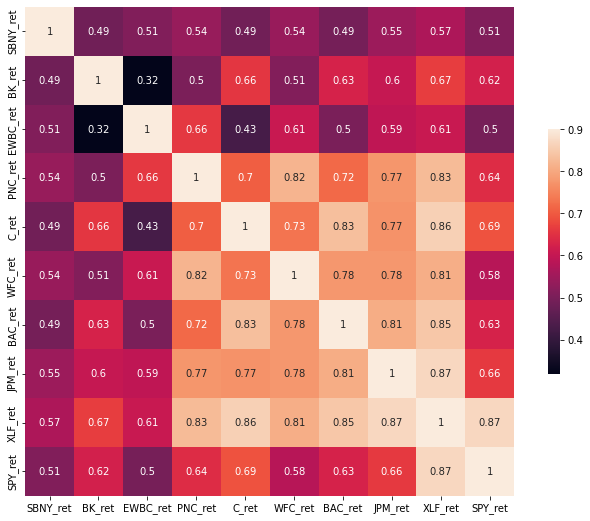

In [13]:
corrmat = returns.corr()
plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax =0.9, square = True, annot=True, cbar_kws ={'shrink': .5})

In [14]:
returns.corr()

,SBNY_ret,BK_ret,EWBC_ret,PNC_ret,C_ret,WFC_ret,BAC_ret,JPM_ret,XLF_ret,SPY_ret
SBNY_ret,1.000000,0.485620,0.508925,0.537973,0.488592,0.541495,0.492102,0.545591,0.567803,0.508449
BK_ret,0.485620,1.000000,0.319612,0.502666,0.657232,0.512087,0.626982,0.602639,0.665884,0.621839
EWBC_ret,0.508925,0.319612,1.000000,0.658625,0.427790,0.607175,0.498850,0.591950,0.606031,0.495535
PNC_ret,0.537973,0.502666,0.658625,1.000000,0.703097,0.817743,0.717829,0.773504,0.827051,0.643505
C_ret,0.488592,0.657232,0.427790,0.703097,1.000000,0.732178,0.832752,0.768885,0.858863,0.691060
WFC_ret,0.541495,0.512087,0.607175,0.817743,0.732178,1.000000,0.776209,0.776811,0.808350,0.580403
BAC_ret,0.492102,0.626982,0.498850,0.717829,0.832752,0.776209,1.000000,0.806683,0.845378,0.627194
JPM_ret,0.545591,0.602639,0.591950,0.773504,0.768885,0.776811,0.806683,1.000000,0.869192,0.661582
XLF_ret,0.567803,0.665884,0.606031,0.827051,0.858863,0.808350,0.845378,0.869192,1.000000,0.870299
SPY_ret,0.508449,0.621839,0.495535,0.643505,0.691060,0.580403,0.627194,0.661582,0.870299,1.000000


### Question 6: Use statsmodels regression librar to run a regression of PNC return agians  SPY_ret.


In [15]:
reg1 = smf.ols('PNC_ret ~ SPY_ret', data = returns).fit()
np.array(reg1.summary())

array(<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                PNC_ret   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     133.6
Date:                Tue, 10 May 2022   Prob (F-statistic):           1.03e-23
Time:                        20:21:43   Log-Likelihood:                 263.75
No. Observations:                 191   AIC:                            -523.5
Df Residuals:                     189   BIC:                            -517.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### Question 7: Use statsmodels regression librar to run a regression of PNC return agians XLF_ret and SPY_ret


In [16]:
reg2 = smf.ols('PNC_ret ~ SPY_ret + XLF_ret', data = returns).fit()
np.array(reg2.summary())

array(<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                PNC_ret   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     227.9
Date:                Tue, 10 May 2022   Prob (F-statistic):           5.58e-51
Time:                        20:21:43   Log-Likelihood:                 330.25
No. Observations:                 191   AIC:                            -654.5
Df Residuals:                     188   BIC:                            -644.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### Question 8: Veriy that the following code runs a regression of PNC_ret on XLF_returns and creates PNC_ret prediction column conditional on XLF_ret and calculates the residual return of PNC with respect to XLF return
lm0 = smf.ols(' PNC_ret ~ XLF_ret', data =returns ).fit()
returns['pnc|xlf']= lm0.predict()
returns['pnc_xlf_res']= returns['PNC_ret']-returns['pnc|xlf']
returns.head()


In [17]:
lm0 = smf.ols(' PNC_ret ~ XLF_ret', data =returns ).fit()
returns['pnc|xlf']= lm0.predict()
returns['pnc_xlf_res']= returns['PNC_ret']-returns['pnc|xlf']
returns.head()

,date,SBNY_ret,BK_ret,EWBC_ret,PNC_ret,C_ret,WFC_ret,BAC_ret,JPM_ret,XLF_ret,SPY_ret,pnc|xlf,pnc_xlf_res
1,20060201,0.064039,0.083623,0.021133,0.093121,-0.004508,0.029506,0.036626,0.043799,0.021283,0.005726,0.026292,0.066828
2,20060301,0.005864,0.052570,0.024227,-0.043212,0.029434,0.003226,-0.006761,0.012154,-0.002452,0.012477,0.002863,-0.046075
3,20060401,0.085302,-0.024695,0.029053,0.061804,0.057591,0.075466,0.108266,0.089817,0.048913,0.016659,0.053566,0.008237
4,20060501,0.010179,-0.048786,0.007058,-0.027843,-0.002780,-0.033775,-0.030449,-0.052697,-0.037692,-0.030121,-0.031924,0.004080
5,20060601,-0.093759,-0.030996,-0.049866,0.018285,-0.021298,0.018499,0.004111,-0.015009,-0.010404,-0.001804,-0.004987,0.023272


In [18]:
returns.corr()

,SBNY_ret,BK_ret,EWBC_ret,PNC_ret,C_ret,WFC_ret,BAC_ret,JPM_ret,XLF_ret,SPY_ret,pnc|xlf,pnc_xlf_res
SBNY_ret,1.000000,0.485620,0.508925,0.537973,0.488592,0.541495,0.492102,0.545591,5.678027e-01,0.508449,5.678027e-01,1.216293e-01
BK_ret,0.485620,1.000000,0.319612,0.502666,0.657232,0.512087,0.626982,0.602639,6.658842e-01,0.621839,6.658842e-01,-8.548695e-02
EWBC_ret,0.508925,0.319612,1.000000,0.658625,0.427790,0.607175,0.498850,0.591950,6.060309e-01,0.495535,6.060309e-01,2.800190e-01
PNC_ret,0.537973,0.502666,0.658625,1.000000,0.703097,0.817743,0.717829,0.773504,8.270508e-01,0.643505,8.270508e-01,5.621272e-01
C_ret,0.488592,0.657232,0.427790,0.703097,1.000000,0.732178,0.832752,0.768885,8.588635e-01,0.691060,8.588635e-01,-1.285552e-02
WFC_ret,0.541495,0.512087,0.607175,0.817743,0.732178,1.000000,0.776209,0.776811,8.083505e-01,0.580403,8.083505e-01,2.654127e-01
BAC_ret,0.492102,0.626982,0.498850,0.717829,0.832752,0.776209,1.000000,0.806683,8.453781e-01,0.627194,8.453781e-01,3.319244e-02
JPM_ret,0.545591,0.602639,0.591950,0.773504,0.768885,0.776811,0.806683,1.000000,8.691923e-01,0.661582,8.691923e-01,9.719839e-02
XLF_ret,0.567803,0.665884,0.606031,0.827051,0.858863,0.808350,0.845378,0.869192,1.000000e+00,0.870299,1.000000e+00,7.183317e-16
SPY_ret,0.508449,0.621839,0.495535,0.643505,0.691060,0.580403,0.627194,0.661582,8.702994e-01,1.000000,8.702994e-01,-1.356933e-01


### Question 9:Veriy that the following code runs a regression o SPY_ret on XLF_ret  and creates a prediction column for SPY_ret conditional on XLF_ret and calculates the residual return of SPY_ret with respect to XLF_ret
lm1 = smf.ols(' SPY_ret ~ XLF_ret', data =returns ).fit()
returns['spy|xlf']= lm1.predict()
returns['spy_xlf_res']= returns['SPY_ret']-returns['spy|xlf']
returns.head()


In [19]:
lm1 = smf.ols(' SPY_ret ~ XLF_ret', data =returns ).fit()
returns['spy|xlf']= lm1.predict()
returns['spy_xlf_res']= returns['SPY_ret']-returns['spy|xlf']
returns.head()

,date,SBNY_ret,BK_ret,EWBC_ret,PNC_ret,C_ret,WFC_ret,BAC_ret,JPM_ret,XLF_ret,SPY_ret,pnc|xlf,pnc_xlf_res,spy|xlf,spy_xlf_res
1,20060201,0.064039,0.083623,0.021133,0.093121,-0.004508,0.029506,0.036626,0.043799,0.021283,0.005726,0.026292,0.066828,0.018130,-0.012405
2,20060301,0.005864,0.052570,0.024227,-0.043212,0.029434,0.003226,-0.006761,0.012154,-0.002452,0.012477,0.002863,-0.046075,0.004628,0.007849
3,20060401,0.085302,-0.024695,0.029053,0.061804,0.057591,0.075466,0.108266,0.089817,0.048913,0.016659,0.053566,0.008237,0.033848,-0.017189
4,20060501,0.010179,-0.048786,0.007058,-0.027843,-0.002780,-0.033775,-0.030449,-0.052697,-0.037692,-0.030121,-0.031924,0.004080,-0.015419,-0.014702
5,20060601,-0.093759,-0.030996,-0.049866,0.018285,-0.021298,0.018499,0.004111,-0.015009,-0.010404,-0.001804,-0.004987,0.023272,0.000104,-0.001908


In [20]:
returns.mean()

date                    inf
SBNY_ret       1.664533e-02
BK_ret         7.026192e-03
EWBC_ret       1.395656e-02
PNC_ret        1.133444e-02
C_ret          3.036670e-04
WFC_ret        8.720166e-03
BAC_ret        9.885732e-03
JPM_ret        1.266131e-02
XLF_ret        6.130557e-03
SPY_ret        9.510269e-03
pnc|xlf        1.133444e-02
pnc_xlf_res    9.191310e-18
spy|xlf        9.510269e-03
spy_xlf_res    5.013442e-18
dtype: float64

In [21]:
returns.std()

C:\Users\shane\AppData\Local\Temp/ipykernel_21580/54076382.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  returns.std()


SBNY_ret       0.089365
BK_ret         0.069005
EWBC_ret       0.133347
PNC_ret        0.079668
C_ret          0.133544
WFC_ret        0.090023
BAC_ret        0.126567
JPM_ret        0.079699
XLF_ret        0.066749
SPY_ret        0.043630
pnc|xlf        0.065890
pnc_xlf_res    0.044784
spy|xlf        0.037971
spy_xlf_res    0.021489
dtype: float64

### Question 10: Runa regression of pnc_xlf_res agains spy_xlf_res. compare the beta of this regression with


In [22]:
reg3 = smf.ols('pnc_xlf_res ~ spy_xlf_res ', data = returns).fit()
np.array(reg3.summary())

array(<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:            pnc_xlf_res   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     15.52
Date:                Tue, 10 May 2022   Prob (F-statistic):           0.000115
Time:                        20:21:43   Log-Likelihood:                 330.25
No. Observations:                 191   AIC:                            -656.5
Df Residuals:                     189   BIC:                            -650.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

### Question 11 : Assume you want to assess the unconditional VaR of each symbol over the period 2005-2021. use the quantile method to output those VaRs. Based on this output, the bank with the worst VaR is


In [23]:
returns_var= returns.filter(like= 'ret')
p05 = abs(returns_var.quantile(0.05))
p05.sort_values(axis=0,ascending=False,inplace=False)

C_ret       0.192799
EWBC_ret    0.192013
BAC_ret     0.155014
WFC_ret     0.128625
JPM_ret     0.116921
BK_ret      0.106668
PNC_ret     0.105380
XLF_ret     0.104215
SBNY_ret    0.100835
SPY_ret     0.071908
Name: 0.05, dtype: float64

### Question 12 :Verify that the following code creates two columns in the data frame returns. One is the 'year' and the other is 'period'
returns['year']=pd.to_datetime(returns['date']).dt.year
cond=[ (returns.year <  2011),
(returns.year > 2010) & (returns.year< 2016),
(returns.year > 2015) ]
values = ['2006-2010', '2011-2015' , '2016-2021']
returns['period']= np.select(cond, values)
returns.period.value_counts()


In [24]:
returns['year']=pd.to_datetime(returns['date']).dt.year
cond=[ (returns.year <  2011),
(returns.year > 2010) & (returns.year< 2016),
(returns.year > 2015) ]
values = ['2006-2010', '2011-2015' , '2016-2021']
returns['period']= np.select(cond, values)
returns.period.value_counts()

2016-2021    72
2011-2015    60
2006-2010    59
Name: period, dtype: int64

### Question 13:Verify that the following code helps calculating the VaR for each period
returns_only= returns.filter(like='ret')
returns.groupby('period')[returns_only.columns].quantile(0.05)


In [25]:
returns_only= returns.filter(like='ret')
VaR_2 = returns.groupby('period')[returns_only.columns].quantile(0.05)

In [26]:
VaR_2 =abs(VaR_2.select_dtypes(exclude=['object', 'datetime']))
VaR_2

,SBNY_ret,BK_ret,EWBC_ret,PNC_ret,C_ret,WFC_ret,BAC_ret,JPM_ret,XLF_ret,SPY_ret
period,,,,,,,,,,
2006-2010,0.094462,0.100617,0.261301,0.147146,0.339529,0.150819,0.301101,0.140479,0.182051,0.089262
2011-2015,0.083493,0.101230,0.082215,0.072903,0.134451,0.066151,0.152862,0.102682,0.071678,0.055230
2016-2021,0.134883,0.106308,0.157067,0.091845,0.148337,0.124120,0.130934,0.088480,0.076729,0.064275


In [27]:
VaR_2.T.max()

period
2006-2010    0.339529
2011-2015    0.152862
2016-2021    0.157067
dtype: float64

In [28]:
VaR_2['worst'] = VaR_2.max(axis =1 )
VaR_2.sum(axis =1)

period
2006-2010    2.146296
2011-2015    1.075758
2016-2021    1.280044
dtype: float64

### Question 14: Assume you want to calculate the conditional 5%_Var of the market (SPY) using Returns on citigroup ( C ). Import the relevant libraries for Quantile Regression and run a Quantile regression over all data (2016-2021) and output the regression summary and answer questions 14 and 15

In [29]:
var_2016_2021 = returns.loc[returns['period'] == '2016-2021']
var_2016_2021.head()

,date,SBNY_ret,BK_ret,EWBC_ret,PNC_ret,C_ret,WFC_ret,BAC_ret,JPM_ret,XLF_ret,SPY_ret,pnc|xlf,pnc_xlf_res,spy|xlf,spy_xlf_res,year,period
120,20160101,-0.091478,-0.121300,-0.219923,-0.090861,-0.177198,-0.075975,-0.157468,-0.098894,-0.082833,-0.044132,-0.076484,-0.014378,-0.041098,-0.003034,2016,2016-2021
121,20160201,-0.070260,-0.018197,-0.070101,-0.056056,-0.086473,-0.065897,-0.114569,-0.047434,-0.029006,-0.000826,-0.023349,-0.032707,-0.010477,0.009652,2016,2016-2021
122,20160301,0.050714,0.040690,0.083750,0.040093,0.074646,0.038667,0.079872,0.051865,0.066856,0.061790,0.071278,-0.031185,0.044055,0.017735,2016,2016-2021
123,20160401,0.012562,0.092587,0.154249,0.037957,0.108503,0.033499,0.081021,0.067207,0.040598,0.009119,0.045359,-0.007402,0.029118,-0.019999,2016,2016-2021
124,20160501,-0.020533,0.049619,0.029607,0.028660,0.007330,0.014806,0.015797,0.040400,0.018876,0.017011,0.023916,0.004744,0.016761,0.000251,2016,2016-2021


In [30]:
model = smf.quantreg('SPY_ret ~ C_ret', returns_only)
out = model.fit(q=.05)

In [31]:
np.array(out.summary())

array(<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
Dep. Variable:                SPY_ret   Pseudo R-squared:               0.2923
Model:                       QuantReg   Bandwidth:                     0.02090
Method:                 Least Squares   Sparsity:                       0.4055
Date:                Tue, 10 May 2022   No. Observations:                  191
Time:                        20:21:43   Df Residuals:                      189
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0478      0.007     -7.310      0.000      -0.061      -0.035
C_ret          0.1797      0.123      1.464      0.145      -0.062       0.422
""", dtype=object)

### Question 15:If you expect C to loose 30%,


In [32]:
out.params

Intercept   -0.047781
C_ret        0.179730
dtype: float64

In [33]:
r = -.30
SPY_cond_Var = out.params['Intercept'] + out.params['C_ret']*r
SPY_cond_Var

-0.10169975547231014

### Question 16: One way to estimate the unconditional VaR of SPY_ret is to run the following regression
mod = smf.quantreg('SPY_ret ~ 1', returns)
out = mod.fit(q=.05)
out.summary()


In [34]:
mod = smf.quantreg('SPY_ret ~ 1', returns)
out_2 = mod.fit(q=.05)
np.array(out_2.summary())

array(<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
Dep. Variable:                SPY_ret   Pseudo R-squared:            0.0009914
Model:                       QuantReg   Bandwidth:                     0.02962
Method:                 Least Squares   Sparsity:                       0.6259
Date:                Tue, 10 May 2022   No. Observations:                  191
Time:                        20:21:44   Df Residuals:                      190
                                        Df Model:                            0
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0742      0.010     -7.356      0.000      -0.094      -0.054
""", dtype=object)

### Question 17: Consider and run the following code
mod = smf.quantreg('SPY_ret ~ period + C_ret -1', returns)
out = mod.fit(q=.05)
out.summary()

In [35]:
mod = smf.quantreg('SPY_ret ~ period + C_ret -1', returns)
out_3 = mod.fit(q=.05)
np.array(out_3.summary())

array(<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
Dep. Variable:                SPY_ret   Pseudo R-squared:               0.3497
Model:                       QuantReg   Bandwidth:                     0.03164
Method:                 Least Squares   Sparsity:                       0.3297
Date:                Tue, 10 May 2022   No. Observations:                  191
Time:                        20:21:44   Df Residuals:                      187
                                        Df Model:                            3
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
period[2006-2010]    -0.0831      0.012     -7.114      0.000      -0.106      -0.060
period[2011-2015]    -0.0316      0.009     -3.391      0.001      -0.050      -0.013
period[2016-2021]    -0.0447      0.009     -4.81

In [36]:
f= (out_3.params['period[2016-2021]']+ out_3.params['period[2011-2015]'])/2
f = f*2*100
f


-7.6305401053081585

### Question 18: Consider and run the following code
mod = smf.quantreg('SPY_ret ~ period *C_ret -1', returns)
out = mod.fit(q=.05)
out.summary()


In [37]:
mod = smf.quantreg('SPY_ret ~ period *C_ret -1', returns)
out_4 = mod.fit(q=.05)
np.array(out_4.summary())

array(<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
Dep. Variable:                SPY_ret   Pseudo R-squared:               0.4166
Model:                       QuantReg   Bandwidth:                     0.02659
Method:                 Least Squares   Sparsity:                       0.2321
Date:                Tue, 10 May 2022   No. Observations:                  191
Time:                        20:21:44   Df Residuals:                      185
                                        Df Model:                            5
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
period[2006-2010]            -0.0632      0.008     -7.984      0.000      -0.079      -0.048
period[2011-2015]            -0.0326      0.008     -4.334      0.000      -0.047      -0.018
period[2016-2021]

In [38]:
np.average(out_4.params)

0.04580304215184871

### Question 19: Use the following returnss and quantreg to explain the 5% SPY i
XLF_ret	JPM_ret	BAC_ret	WFC_ret	C_ret	PNC_ret	EWBC_ret	BK_ret	SBNY_ret


In [39]:
mod = smf.quantreg('SPY_ret ~ XLF_ret + JPM_ret	+ BAC_ret + WFC_ret	+ C_ret	+ PNC_ret +	EWBC_ret +	BK_ret +SBNY_ret ', returns)
out_5 = mod.fit(q = 0.05)
np.array(out_5.summary())

array(<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
Dep. Variable:                SPY_ret   Pseudo R-squared:               0.6873
Model:                       QuantReg   Bandwidth:                     0.01604
Method:                 Least Squares   Sparsity:                       0.1290
Date:                Tue, 10 May 2022   No. Observations:                  191
Time:                        20:21:44   Df Residuals:                      181
                                        Df Model:                            9
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0238      0.003     -8.718      0.000      -0.029      -0.018
XLF_ret        1.6425      0.066     24.971      0.000       1.513       1.772
JPM_ret       -0.3292      0.107     -3.081      0.002      -0.540      -0.11

### Question 20:Use the following code to creat a column in the data fram 'returns' for the worst return of the banks-returns
bank_names= returns.columns[2:11]
returns['worst'] = returns[bank_names].min(axis=1)
returns.head()

In [40]:
bank_names= returns.columns[2:11]
returns['worst'] = returns[bank_names].min(axis=1)
returns.head()

,date,SBNY_ret,BK_ret,EWBC_ret,PNC_ret,C_ret,WFC_ret,BAC_ret,JPM_ret,XLF_ret,SPY_ret,pnc|xlf,pnc_xlf_res,spy|xlf,spy_xlf_res,year,period,worst
1,20060201,0.064039,0.083623,0.021133,0.093121,-0.004508,0.029506,0.036626,0.043799,0.021283,0.005726,0.026292,0.066828,0.018130,-0.012405,2006,2006-2010,-0.004508
2,20060301,0.005864,0.052570,0.024227,-0.043212,0.029434,0.003226,-0.006761,0.012154,-0.002452,0.012477,0.002863,-0.046075,0.004628,0.007849,2006,2006-2010,-0.043212
3,20060401,0.085302,-0.024695,0.029053,0.061804,0.057591,0.075466,0.108266,0.089817,0.048913,0.016659,0.053566,0.008237,0.033848,-0.017189,2006,2006-2010,-0.024695
4,20060501,0.010179,-0.048786,0.007058,-0.027843,-0.002780,-0.033775,-0.030449,-0.052697,-0.037692,-0.030121,-0.031924,0.004080,-0.015419,-0.014702,2006,2006-2010,-0.052697
5,20060601,-0.093759,-0.030996,-0.049866,0.018285,-0.021298,0.018499,0.004111,-0.015009,-0.010404,-0.001804,-0.004987,0.023272,0.000104,-0.001908,2006,2006-2010,-0.049866


In [41]:
mod = smf.quantreg('SPY_ret ~ worst ', returns)
out_6 = mod.fit(q=0.05)
np.array(out_6.summary())

array(<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
Dep. Variable:                SPY_ret   Pseudo R-squared:               0.4746
Model:                       QuantReg   Bandwidth:                     0.02267
Method:                 Least Squares   Sparsity:                       0.1964
Date:                Tue, 10 May 2022   No. Observations:                  191
Time:                        20:21:44   Df Residuals:                      189
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0040      0.004     -1.141      0.255      -0.011       0.003
worst          0.5013      0.017     28.710      0.000       0.467       0.536
""", dtype=object)

In [42]:
s = -.30
x = out_6.params['Intercept'] + out_6.params['worst'] * s *100
x

-15.042237675360393